In [56]:
%matplotlib inline
import pandas as pd

In [57]:
titles=pd.DataFrame.from_csv(r'C:\Users\abhij\Desktop\pycon-pandas-tutorial-master\data\titles.csv',index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gai shi dao wang,1969


In [58]:
cast=pd.DataFrame.from_csv(r'C:\Users\abhij\Desktop\pycon-pandas-tutorial-master\data\cast.csv',index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [59]:
dates=pd.DataFrame.from_csv(r'C:\Users\abhij\Desktop\pycon-pandas-tutorial-master\data\release_dates.csv',index_col=None)
dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


# What are the ten most common movie names of all time?


In [60]:
titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 15
Maya                    12
The Outsider            12
Freedom                 11
Othello                 11
The Three Musketeers    11
Paradise                10
Vengeance               10
Name: title, dtype: int64

 # Which three years of the 1930s saw the most films released?  

In [61]:
t1=titles[titles.year//10==193]

In [62]:
t1.year.value_counts().head(3)

1937    1202
1936    1143
1938    1139
Name: year, dtype: int64

# Plot the number of films that have been released each decade over the history of cinema.

In [70]:
t=titles

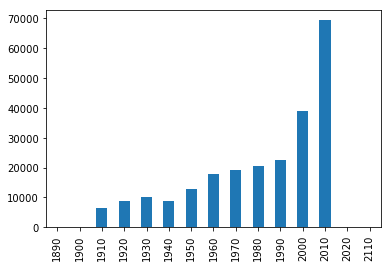

In [73]:
(t.year//10*10).value_counts().sort_index().plot(kind='bar')

#  Plot the number of "Rustler" characters in each decade of the history of film

In [75]:
rust=cast[cast.character=='Rustler']

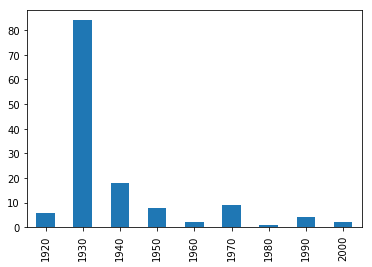

In [77]:
(rust.year//10*10).value_counts().sort_index().plot(kind='bar')

# Plot the number of "Hamlet" characters each decade.

In [82]:
ham=cast[cast.character=='Hamlet'].sort_values('n')

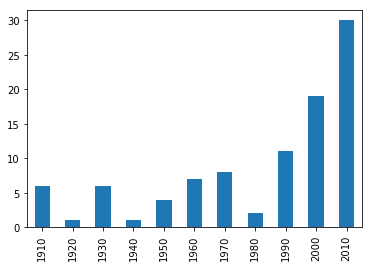

In [84]:
(ham.year//10*10).value_counts().sort_index().plot(kind='bar')

# Plot the number of "Hamlet" films made each decade.

In [86]:
ham1=cast[cast.title=='Hamlet'].sort_index()

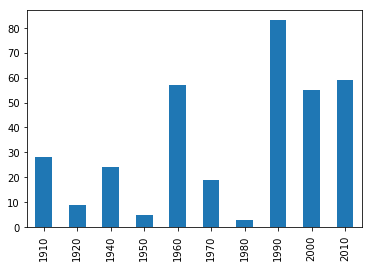

In [87]:
(ham1.year//10*10).value_counts().sort_index().plot(kind='bar')

# What are the 11 most common character names in movie history?

In [91]:
(cast.character).value_counts().head(11)

Himself        20727
Dancer         12257
Extra          11650
Reporter        8338
Doctor          7588
Student         7568
Party Guest     7063
Policeman       6987
Nurse           6820
Bartender       6744
Herself         6549
Name: character, dtype: int64

# Who are the 10 people most often credited as "Herself" in film history?



In [109]:
herself=cast[cast.character=='Herself'].name.value_counts().head(10)

In [111]:
herself

Queen Elizabeth II    12
Margaret Thatcher      9
Laura (II) M?gica      9
Mary Jo Pehl           9
Joyce Brothers         9
Marina Revilla         8
Marta Berrocal         8
Estrella Borja         8
In?s J. Southern       8
Luisa Horga            7
Name: name, dtype: int64

# Who are the 10 people most often credited as "Himself" in film history?

In [112]:
himself=cast[cast.character=='Himself'].name.value_counts().head(10)


In [113]:
himself

Adolf Hitler          99
Richard Nixon         46
Ronald Reagan         40
John F. Kennedy       36
George W. Bush        24
Winston Churchill     23
Ron Jeremy            23
Bill Clinton          22
Benito Mussolini      22
Martin Luther King    22
Name: name, dtype: int64

# Which actors or actresses appeared in the most movies in the year 1945?

In [116]:
most=cast[((cast.type=='actor') | (cast.type=='actress')) & (cast.year==1945)]

In [118]:
most.name.value_counts().head(1)

Emmett Vogan    39
Name: name, dtype: int64

# Which actors or actresses appeared in the most movies in the year 1985?

In [119]:
most=cast[((cast.type=='actor') | (cast.type=='actress')) & (cast.year==1985)]
most.name.value_counts().head(1)

Mammootty    22
Name: name, dtype: int64

# Plot how many roles Mammootty has played in each year of his career.

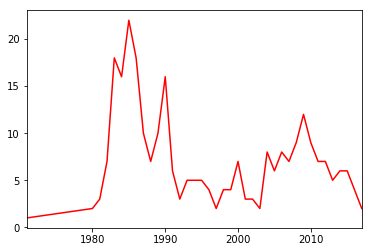

In [126]:
cast[cast.name=='Mammootty'].year.value_counts().sort_index().plot(c='r')

# What are the 10 most frequent roles that start with the phrase "Patron in"?

In [136]:
cast[cast.character.str.startswith('Patron in')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Coffee Shop            2
Name: character, dtype: int64

# What are the 10 most frequent roles that start with the word "Science"?

In [137]:
cast[cast.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Promo Cadet      5
Science Fair Judge       5
Science Club Member      5
Science Kid              5
Science Reporter         5
Science Fair Kid         4
Science                  4
Name: character, dtype: int64

# Plot the n-values of the roles that Judi Dench has played over her career.

In [148]:
judi=cast[cast.name=='Judi Dench'].sort_values('year')


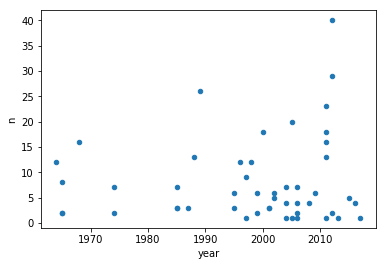

In [152]:
judi=judi[judi.n.notnull()]
judi.plot(x='year',y='n',kind='scatter')

# Plot the n-value of the roles that Sidney Poitier has acted over the years.

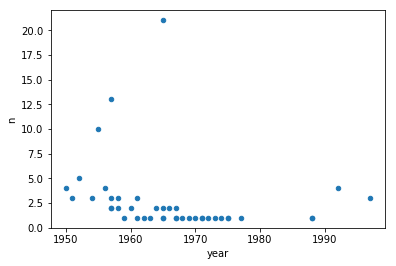

In [153]:
sid=cast[cast.name=='Sidney Poitier'].sort_values('year')
sid=sid[sid.n.notnull()]
sid=sid.plot(x='year',y='n',kind='scatter')

# How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [179]:
c=cast
c=c[c.year//10 ==195]

In [180]:
c=c[c.n==1]

In [181]:
c.type.value_counts()

actor      6693
actress    3004
Name: type, dtype: int64

# How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [183]:
c=cast
c=c[c.year//10==195]
c=c[c.n==2]


In [184]:
c.type.value_counts()

actor      4621
actress    4606
Name: type, dtype: int64